### Some Noteable Quotes
- Lisp description of processes are called *procedures*
- These procedures themselves can be themselves represented and manipulated as Lisp data <sup>1</sup>
- The importance of this is that there are powerful program-design techniques that rely on the ability to blur the traditional distinction between **passive** data and **active processes.** <sup>2</sup>

### Commentary and Reference
1. **Comment:** Is this what they call Abstract Data Type?
2. **Comment:** While processes and data are intertwined with each other it seems that I've misinterpreted before what this statement just meant. It simply a program-design* techniques that has the *ability* to blur the distinction between **passive data** and **active processes**

### 1.1 The Elements of Programming

A powerful programming language is more than just a means for instructing a computer to perform tasks. The language also serves as a framework within which we organize our ideas about processes. Thus, when we describe a language, we should pay particular attention to the means that the language provides for combining simple ideas to form more complex ideas. Every powerful language has three mechanisms for accomplishing this:

- **primitive expressions**, which represent the simplest entities the language is concerned with,
- **means of combination**, by which compound elements are built from simpler ones, and
- **means of abstraction**, by which compound elements can be named and manipulated as units.

In programming, we deal with two kinds of elements: procedures and data. *(Later we will discover that they are really not so distinct.)* Informally, data is "stuff" that we want to manipulate, and procedures are descriptions of the rules for manipulating the data. Thus, any powerful programming language should be able to describe primitive data and primitive procedures and should have methods for combining and abstracting procedures and data.


#### 1.1.1 Expressions

In [1]:
(+ 137 349)

486

In [2]:
(- 1000 334)

666

In [3]:
(* 5 99)

495

In [5]:
(/ 9 5)

9/5

In [6]:
(/ 9.0 5.0)

1.8

In [13]:
(printf "print_3s = ~a\n"  (+ 11 11 11))
(printf "print_4s = ~a\n"  (+ 11 11 11 11))
(printf "print_5s = ~a\n"  (+ 11 11 11 11 11))
(printf "print_6s = ~a\n"  (+ 11 11 11 11 11 11))

print_3s = 33
print_4s = 44
print_5s = 55
print_6s = 66


In [16]:
(printf "nested_v1 = ~a\n" (+ (* 1 2) (* 3 4) (* 5 6)))
(printf "nested_v2 = ~a\n" (+ (* 1 1) (* 2 2) (* 3 3)))
(printf "nested_v3 = ~a\n" (+ (* 2 2) (* 3 3) (* 4 4)))
(printf "nested_v4 = ~a\n" (+ (* 3 3) (* 4 4) (* 5 5)))
(printf "nested_v5 = ~a\n" (+ (* 4 4) (* 5 5) (* 6 6)))

nested_v1 = 44
nested_v2 = 14
nested_v3 = 29
nested_v4 = 50
nested_v5 = 77


### 1.1.2 Naming and the Environment

A critical aspect of a programming language is the means it provides for using names to refer to computational objects. We say that the name identifies a *variable* whose *value* is the object.

In the Scheme dialect of Lisp, we name things with `define`. Typing

```scheme
(define size 2)
```
causes the interpreter to associate the value 2 with the name size.

Once the name size has been associated with the number 2, we can refer to the value 2 by name:

```bash
size
2
```

In [29]:
(define pi 3.14159)
(define radius 10)
(define area (* pi (* radius radius)))
(define circumference (* 2 pi radius))
  
(printf "pi = ~a\n" pi)
(printf "radius = ~a\n" radius)
(printf "area = ~a\n" (* pi (* radius radius)))
(printf "circumference = ~a\n" circumference)

pi = 3.14159
radius = 10
area = 314.159
circumference = 62.8318


#### 1.1.3 Evaluating Combinations

One of our goals in this chapter is to isolate issues about thinking procedurally. As a case in point, let us consider that, in evaluating combinations, the interpreter is itself following a procedure.

To evaluate a combination, do the following:

1. Evaluate the subexpressions of the combination.

2. Apply the procedure that is the value of the leftmost subexpression (the operator) to the arguments that are the values of the other subexpressions (the operands).

Even this simple rule illustrates some important points about processes in general. First, observe that the first step dictates that in order to accomplish the evaluation process for a combination we must first perform the evaluation process on each element of the combination. **Thus, the evaluation rule is *recursive* in nature; that is, it includes, as one of its steps, the need to invoke the rule itself.**

#### Question: Why exactly the evaluating combinations recursive?

Consider the following expression

```scheme
(+ (+ 1 2) (+ 2 2))
```
**Step 1:** To first evaluate it, we need to evaluate the subexpression first `(+ 1 2)`. This invokes the combination evaluation rule 1. Then

```scheme
(+ 3 (+ 2 2))
```
**Step 2:** We evaluate the subexpression again, this time `(+ 2 2)`

```scheme
(+ 3 4)
```

**Step 3:** Finally, we evaluate `(+ 3 4)`, which results to `7`

From step 1 to 3, for every evaluation, there's a repeatedly invocation of combination rules. Thus, the evaluation rule is recursive. $\square$

**Note:** 

Recursion **percolates values** upward form of the evaluation rule is an example of a general kind of process known as *tree accumulation*

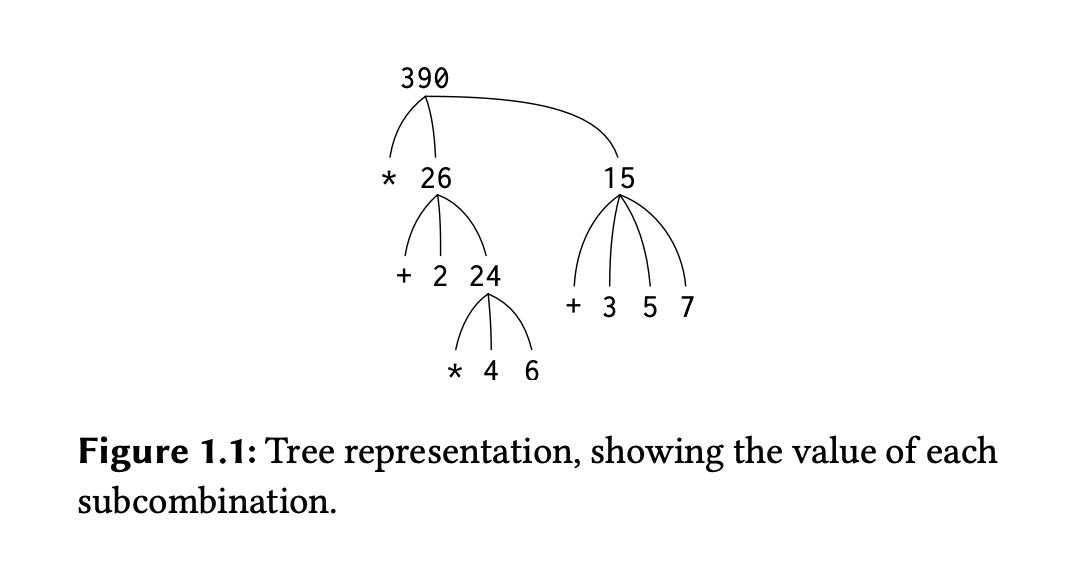

### 1.1.4 Compound Procedures

We have identified in Lisp some of the elements that must appear in any powerful programming language:

- Numbers and arithmetic operations are primitive data and procedures.
- Nesting of combinations provides a means of combining operations.
- Definitions that associate names with values provide a limited means of abstraction.

Now we will learn about *procedure definitions*, a much more powerful abstraction technique by which a compound operation can be given a name and then referred to as a unit.


In [32]:
; Procedure definition of square
(define (square x) (* x x))
(square 2)

4

In [37]:
; Pythagorean Theorem
(define x 1)
(define y 2)
(printf "x = ~a\n" x)
(printf "y = ~a\n" y)
(printf "x^2 + y^2 = ~a\n" (+ (square 1) (square 2)))
; Or sum of squares -- this is called compound procedures
(define (sum-of-squares x y) (+ (square x) (square y)))
(printf "x^2 + y^2 = ~a\n" (sum-of-squares x y))

x = 1
y = 2
x^2 + y^2 = 5
x^2 + y^2 = 5


#### Applicative order versus normal order

This alternative *“fully expand and then reduce”* evaluation method is known as *normal-order evaluation*, in contrast to the *“evaluate the arguments and then apply”* method that the interpreter actually uses, which is called *applicative-order evaluation*. It can be shown that, for procedure applications that can be modeled using substitution (including all the procedures in the first two chapters of this book) and that yield legitimate values, normal-order and applicative-order evaluation produce the same value. (See **Exercise 1.5** for an instance of an *“illegitimate”* value where normal-order and applicative-order evaluation do not give the same result.)
